# Data Analysis Assignment: Transactional Data

This assignment is designed to test your proficiency with Python's core data science libraries: Pandas, NumPy, Matplotlib, and Seaborn. You will be working with a  dataset containing information about various transactions. The goal is to clean, analyze, and visualize the data to uncover meaningful patterns.

## The Dataset

You should use the `frozen_confections_data.csv` file provided with this assignment. It contains the following columns:

- `TransactionID`
- `SuccessfulOrder`
- `FlavorCategory`
- `CustomerGender`
- `CustomerAge`
- `ToppingsCount`
- `ScoopsCount`
- `TotalCost`
- `PaymentMethod`
- `CustomerName`

---

## Part 1: Data Loading and Initial Inspection (Pandas)

**Objective:** Load the dataset and perform basic checks to understand its structure and content.

1.  Load the `frozen_confections_data.csv` file into a Pandas DataFrame.
    * **Step:** Use `pd.read_csv()`.
2.  Display the first 5 rows of the DataFrame.
    * **Step:** Use the `.head()` method.
3.  Get a concise summary of the DataFrame, including the data types of each column and the number of non-null values.
    * **Step:** Use the `.info()` method.
4.  Display the columns and their respective data types.
    * **Step:** Use the `.dtypes` attribute.
5.  Check the dimensions (number of rows and columns) of the DataFrame.
    * **Step:** Use the `.shape` attribute.

---

In [1]:
import pandas as pd

df = pd.read_csv('frozen_confections_data.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataFrame info:")
print(df.info())

print("\nData types of the columns:")
print(df.dtypes)

print("\nDimensions of the dataset (rows, columns):")
print(df.shape)

First 5 rows of the dataset:
   TransactionID  SuccessfulOrder  FlavorCategory CustomerGender  CustomerAge  \
0              1                0               1         Female           18   
1              2                0               2         Female           30   
2              3                0               3           Male           11   
3              4                0               2         Female           50   
4              5                0               1         Female           45   

   ToppingsCount  ScoopsCount   TotalCost PaymentMethod   CustomerName  
0              0            3  127.308107           UPI      Rahul Ali  
1              1            3  262.398611           UPI   Aarav Sastry  
2              1            2  185.253343          Card     Isha Joshi  
3              0            1  117.674431           UPI  Vivaan Pillai  
4              2            1  107.031628           UPI   Suresh Dubey  

DataFrame info:
<class 'pandas.core.frame.Dat

## Part 2: Data Cleaning and Manipulation (Pandas)

**Objective:** Clean the data and prepare it for analysis.

6.  Calculate the number of missing values in each column.
    * **Step:** Use `.isnull()` followed by `.sum()`.
7.  Check if there are any duplicate rows in the DataFrame.
    * **Step:** Use `.duplicated()` and `.sum()`.
8.  Rename the `SuccessfulOrder` column to `OrderSuccess`.
    * **Step:** Use the `.rename()` method with the `columns` parameter.
9.  Create a new column named `ItemsCount` which is the sum of `ToppingsCount` and `ScoopsCount`.
    * **Step:** Add the two columns together.
10. Calculate the average `TotalCost` for each `PaymentMethod`.
    * **Step:** Use the `.groupby()` method on `PaymentMethod` and then apply `.mean()` to `TotalCost`.

---

In [4]:
import pandas as pd

df = pd.read_csv('frozen_confections_data.csv')

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

df.rename(columns={'SuccessfulOrder': 'OrderSuccess'}, inplace=True)
print("Columns after renaming 'SuccessfulOrder' to 'OrderSuccess':")
print(df.columns)

df['ItemsCount'] = df['ToppingsCount'] + df['ScoopsCount']
print("First 5 rows after adding 'ItemsCount':")
print(df[['ToppingsCount', 'ScoopsCount', 'ItemsCount']].head())

avg_total_cost = df.groupby('PaymentMethod')['TotalCost'].mean()
print("Average TotalCost for each PaymentMethod:")
print(avg_total_cost)

Missing values in each column:
TransactionID      0
SuccessfulOrder    0
FlavorCategory     0
CustomerGender     0
CustomerAge        0
ToppingsCount      0
ScoopsCount        0
TotalCost          0
PaymentMethod      0
CustomerName       0
dtype: int64
Number of duplicate rows: 0
Columns after renaming 'SuccessfulOrder' to 'OrderSuccess':
Index(['TransactionID', 'OrderSuccess', 'FlavorCategory', 'CustomerGender',
       'CustomerAge', 'ToppingsCount', 'ScoopsCount', 'TotalCost',
       'PaymentMethod', 'CustomerName'],
      dtype='object')
First 5 rows after adding 'ItemsCount':
   ToppingsCount  ScoopsCount  ItemsCount
0              0            3           3
1              1            3           4
2              1            2           3
3              0            1           1
4              2            1           3
Average TotalCost for each PaymentMethod:
PaymentMethod
Card    181.826506
Cash    190.135251
UPI     182.265028
Name: TotalCost, dtype: float64


## Part 3: Basic Exploratory Data Analysis (EDA) and NumPy

**Objective:** Use descriptive statistics and NumPy to gain initial insights.

11. Calculate the mean, median, and standard deviation of `CustomerAge`.
    * **Step:** Use `.mean()`, `.median()`, and `.std()` on the `CustomerAge` column.
12. Find the most common `PaymentMethod` and `FlavorCategory`.
    * **Step:** Use the `.mode()` method.
13. Count the number of successful and unsuccessful orders.
    * **Step:** Use the `.value_counts()` method on the `OrderSuccess` column.
14. Use NumPy to calculate the percentage of successful orders.
    * **Step:** Calculate the sum of successful orders and divide by the total number of records.
15. Find the maximum `TotalCost` and the minimum `TotalCost` from the dataset.
    * **Step:** Use `.max()` and `.min()` on the `TotalCost` column.

---

In [2]:
import numpy as np

mean_age = df["CustomerAge"].mean()
median_age = df["CustomerAge"].median()
std_age = df["CustomerAge"].std()

print("Customer Age Mean:", mean_age)
print("Customer Age Median:", median_age)
print("Customer Age Standard Deviation:", std_age)

most_common_payment = df["PaymentMethod"].mode()[0]
most_common_flavor = df["FlavorCategory"].mode()[0]

print("\nMost Common Payment Method:", most_common_payment)
print("Most Common Flavor Category:", most_common_flavor)

order_counts = df["OrderSuccess"].value_counts()
print("\nOrder Success Counts:")
print(order_counts)

success_count = np.sum(df["OrderSuccess"] == "Success")
total_orders = len(df)
success_percentage = (success_count / total_orders) * 100

print("\nPercentage of Successful Orders:", success_percentage, "%")

max_cost = df["TotalCost"].max()
min_cost = df["TotalCost"].min()

print("\nMaximum Total Cost:", max_cost)
print("Minimum Total Cost:", min_cost)


Customer Age Mean: 24.6602
Customer Age Median: 25.0
Customer Age Standard Deviation: 9.715575867795431

Most Common Payment Method: UPI
Most Common Flavor Category: 1


KeyError: 'OrderSuccess'

## Part 4: Data Visualization (Matplotlib & Seaborn)

**Objective:** Create informative plots to visually represent key relationships in the data.

16. Create a histogram of the `CustomerAge` distribution.
    * **Step:** Use `plt.hist()` from Matplotlib.
17. Visualize the count of orders by `PaymentMethod` using a bar plot.
    * **Step:** Use `sns.countplot()` from Seaborn.
18. Create a countplot to show the number of successful orders (`OrderSuccess`) for each `FlavorCategory`.
    * **Step:** Use `sns.countplot()` and set the `hue` parameter to `OrderSuccess`.
19. Create a box plot to show the distribution of `TotalCost` across different `FlavorCategory`s.
    * **Step:** Use `sns.boxplot()`.
20. Create a violin plot to show the distribution of `CustomerAge` for successful versus unsuccessful orders.
    * **Step:** Use `sns.violinplot()`.
21. Generate a scatter plot showing the relationship between `ToppingsCount` and `TotalCost`.
    * **Step:** Use `plt.scatter()` or `sns.scatterplot()`.
22. Create a bar chart showing the average `TotalCost` per `PaymentMethod`.
    * **Step:** Group the data by `PaymentMethod`, calculate the mean `TotalCost`, and then use `sns.barplot()`.
23. Visualize the correlation matrix of the numerical columns using a heatmap.
    * **Step:** Calculate the correlation matrix using `.corr()` and then use `sns.heatmap()`.
24. Create a pie chart to show the proportion of each `FlavorCategory`.
    * **Step:** Use `plt.pie()` after getting the value counts for `FlavorCategory`.
25. Use a pair plot to visualize the relationships between all numerical features.
    * **Step:** Use `sns.pairplot()` on a subset of the DataFrame containing only numerical columns.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
plt.hist(df["CustomerAge"], bins=20, color="skyblue", edgecolor="black")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

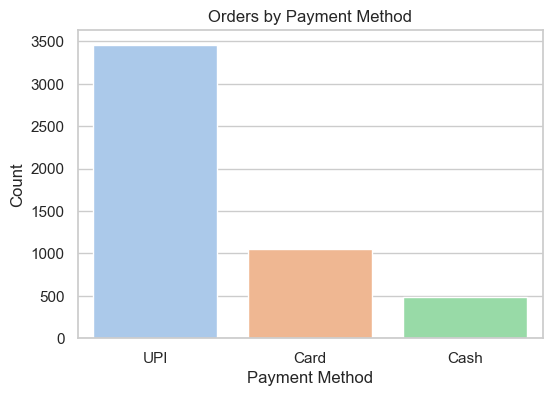

In [18]:
plt.figure(figsize=(6,4))
#sns.countplot(x="PaymentMethod", data=df, palette="pastel")
sns.countplot(x="PaymentMethod", hue="PaymentMethod", data=df, palette="pastel", legend=False)
plt.title("Orders by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

In [3]:
plt.figure(figsize=(7,5))
sns.countplot(x="FlavorCategory", hue="OrderSuccess", data=df, palette="Set2")
plt.title("Successful vs Unsuccessful Orders by Flavor Category")
plt.xlabel("Flavor Category")
plt.ylabel("Count")
plt.show()

NameError: name 'plt' is not defined

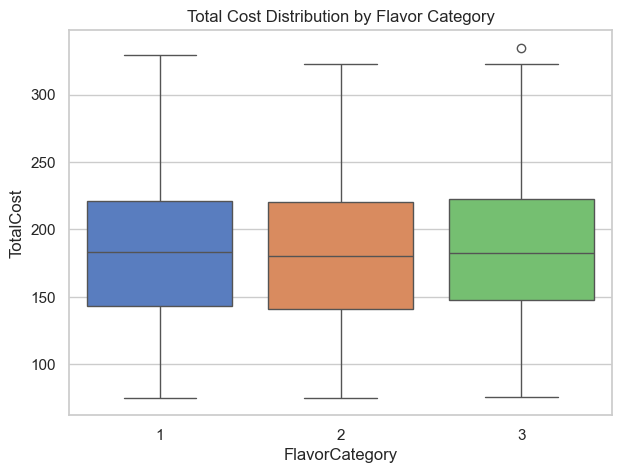

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="FlavorCategory", 
    y="TotalCost", 
    hue="FlavorCategory", 
    data=df, 
    palette="muted", 
    legend=False
)

plt.title("Total Cost Distribution by Flavor Category")
plt.show()

In [4]:
plt.figure(figsize=(6,4))
sns.violinplot(
    x="OrderSuccess", 
    y="CustomerAge", 
    hue="OrderSuccess", 
    data=df, 
    palette="coolwarm", 
    legend=False
)

plt.title("Customer Age Distribution by Order Success")
plt.show()

NameError: name 'plt' is not defined

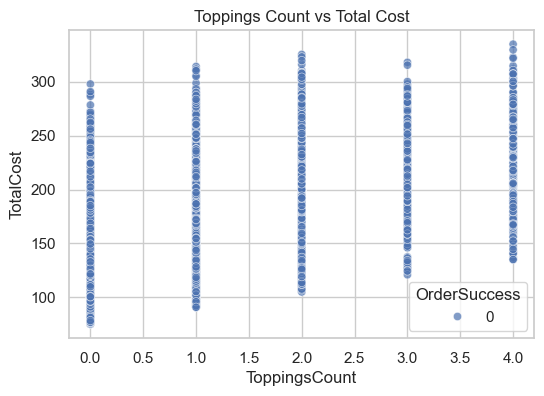

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="ToppingsCount", y="TotalCost", data=df, hue="OrderSuccess", alpha=0.7)
plt.title("Toppings Count vs Total Cost")
plt.show()

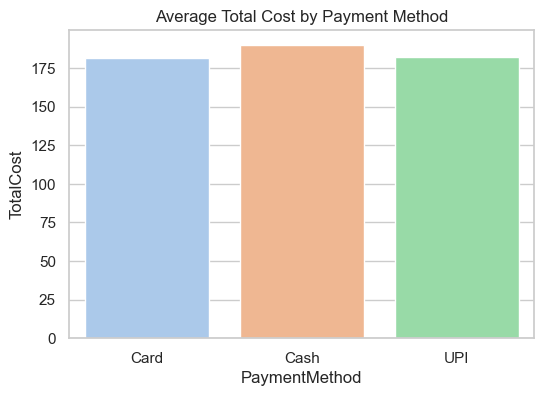

In [22]:
plt.figure(figsize=(6,4))
avg_cost = df.groupby("PaymentMethod")["TotalCost"].mean().reset_index()
sns.barplot(
    x="PaymentMethod", 
    y="TotalCost", 
    hue="PaymentMethod",   
    data=avg_cost, 
    palette="pastel", 
    legend=False          
)

plt.title("Average Total Cost by Payment Method")
plt.show()

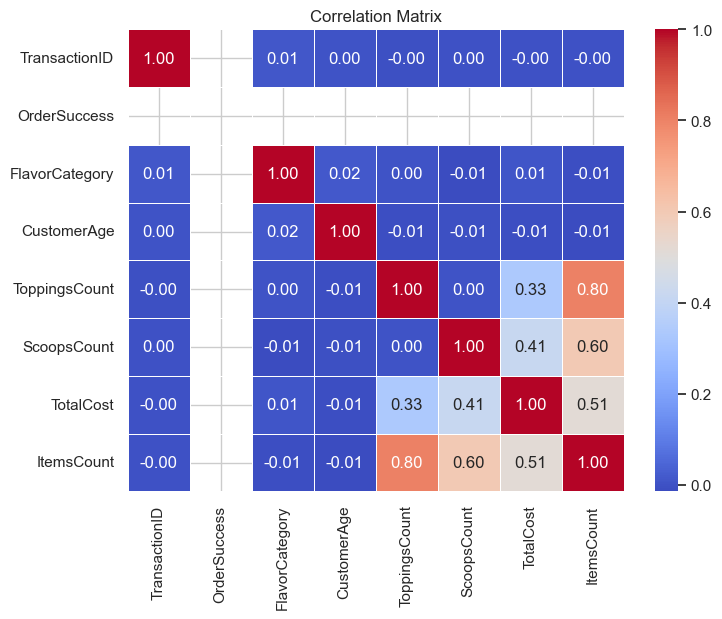

In [13]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

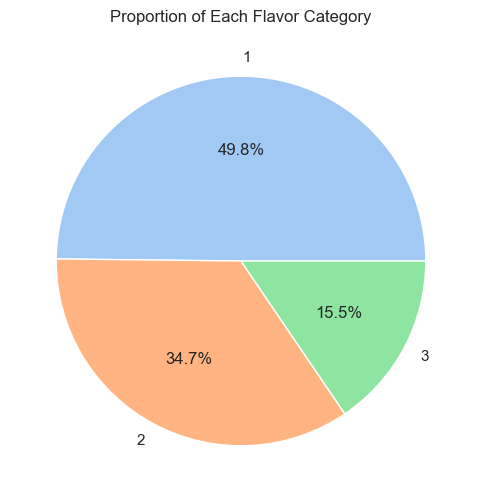

In [14]:
plt.figure(figsize=(6,6))
flavor_counts = df["FlavorCategory"].value_counts()
plt.pie(flavor_counts, labels=flavor_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Proportion of Each Flavor Category")
plt.show()

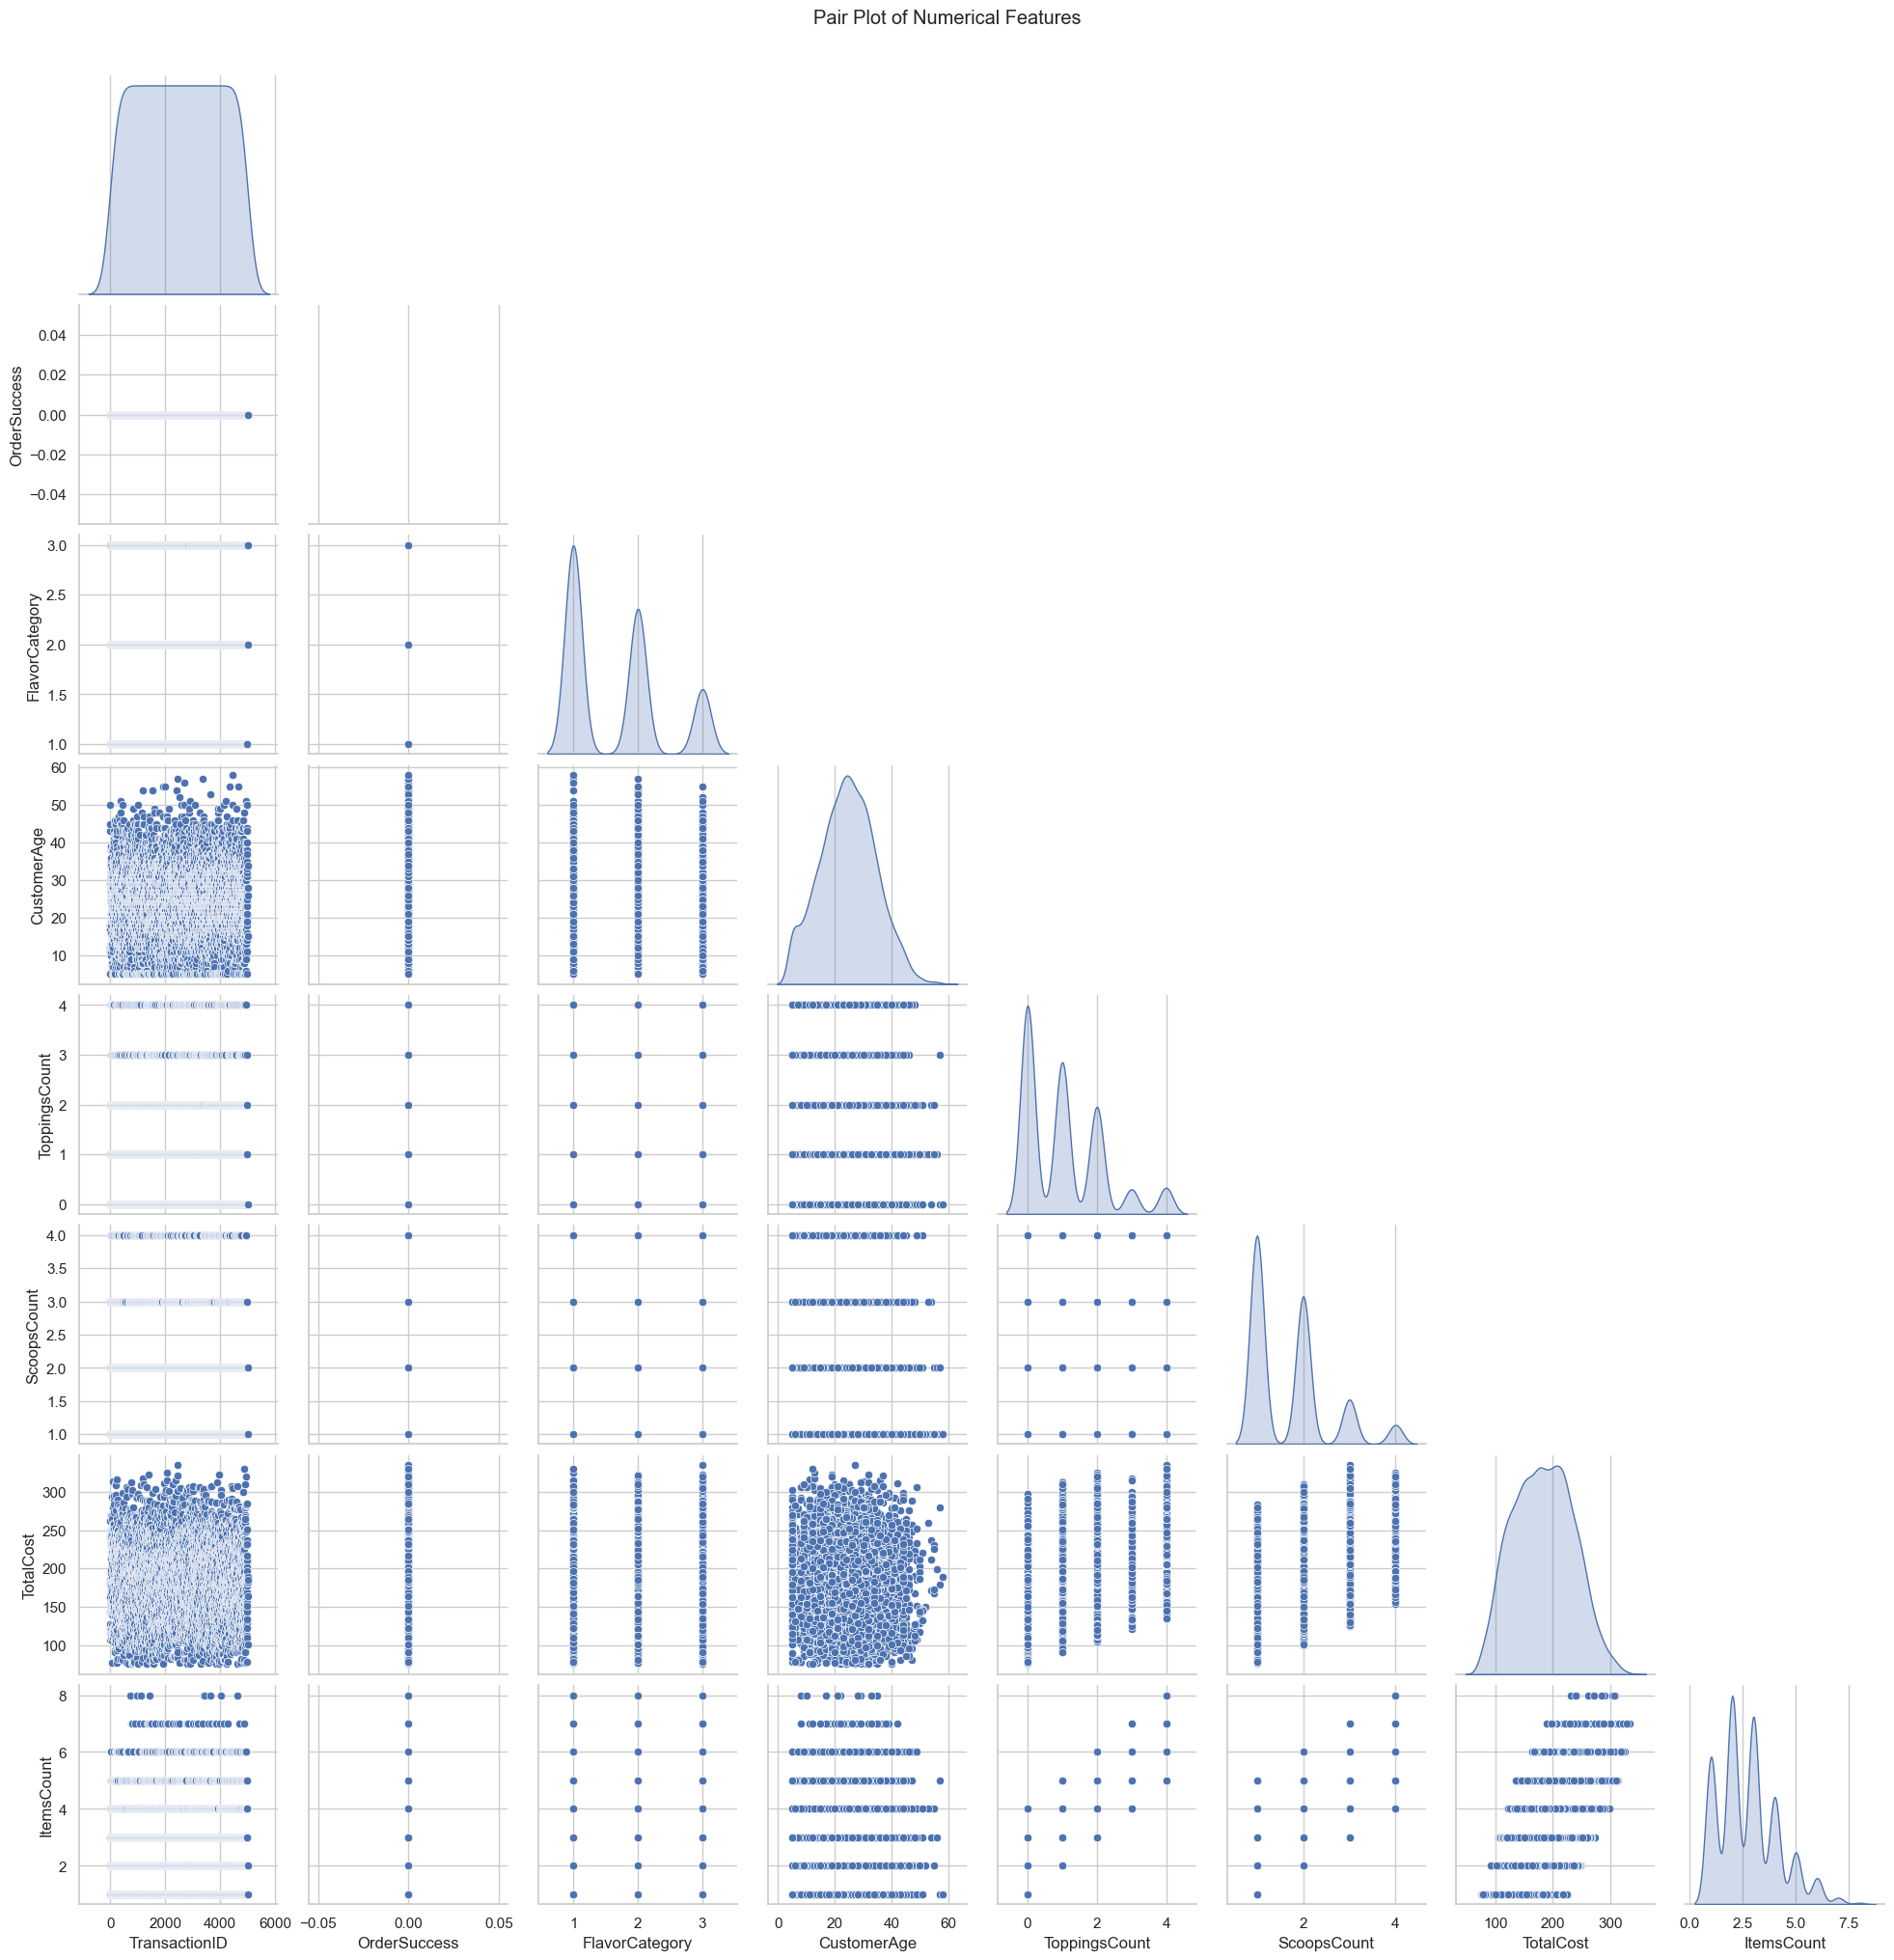

In [16]:
sns.pairplot(df.select_dtypes(include=["int64", "float64"]), diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()